In [1]:
import sys
import os 
sys.path.append('../')
from util.benchmarking import generate_baseline
import pandas as pd 
from tensornetwork.contraction import * 
from tensornetwork.stopping import * 
import time 
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Using C++ implementation for incQR


In [2]:
import pandas as pd

def load_specific_experiment_results(file_path):
    # Check if file exists
    try:
        results_df = pd.read_csv(file_path)
        print(f"Data loaded from {file_path}")
        return results_df
    except FileNotFoundError:
        print(f"File {file_path} does not exist.")
        return None
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        return None

def extract_experiment_data(df, names):
    # Initialize the dictionaries
    times = {name: [] for name in names}
    std_times = {name: [] for name in names}
    accs = {name: [] for name in names}
    std_accs = {name: [] for name in names}
    
    # Loop through each name and populate the dictionaries
    for name in names:
        times_col = f'{name} Mean Time'
        std_times_col = f'{name} Time Std'
        accs_col = f'{name} Mean Accuracy'
        std_accs_col = f'{name} Accuracy Std'
        
        # Populate the dictionaries by extracting data from the dataframe
        times[name] = df[times_col].tolist()
        std_times[name] = df[std_times_col].tolist()
        accs[name] = df[accs_col].tolist()
        std_accs[name] = df[std_accs_col].tolist()
    
    return times, std_times, accs, std_accs

# Provide the specific path to the CSV file
file_path = "/Users/pren/Research/RandomMPOMPS/Figures/Figure2_data/rerunOct6.csv"
results = load_specific_experiment_results(file_path)

# Display the loaded data
if results is not None:
    display(results)
# Assuming 'results_df' is your DataFrame and 'names' is a list of algorithm names
names = ['naive', 'rand_then_orth', 'random+oversample', 'random', 'density', 'zipup', 'fit']
times, std_times, accs, std_accs = extract_experiment_data(results, names)

# Now you have the dictionaries reconstructed from the DataFrame
print("Times:", times)
print("Standard Times:", std_times)
print("Accuracies:", accs)
print("Standard Accuracies:", std_accs)

Data loaded from /Users/pren/Research/RandomMPOMPS/Figures/Figure2_data/rerunOct6.csv


,Bond Dimension,random Mean Time,random Time Std,random Mean Accuracy,random Accuracy Std,random+oversample Mean Time,random+oversample Time Std,random+oversample Mean Accuracy,random+oversample Accuracy Std,zipup Mean Time,...,rand_then_orth Mean Accuracy,rand_then_orth Accuracy Std,naive Mean Time,naive Time Std,naive Mean Accuracy,naive Accuracy Std,density Mean Time,density Time Std,density Mean Accuracy,density Accuracy Std
0,5,1.36e-01,1.19e-02,1.69e-04,1.81e-05,3.53e-01,1.55e-02,2.19e-05,3.94e-10,1.37e-01,...,1.26e-04,4.07e-05,6.94e+02,8.11e-01,2.19e-05,0.00e+00,1.23e+02,7.72e-01,2.18e-05,0.00e+00
1,10,2.55e-01,1.22e-02,4.28e-06,3.90e-07,4.81e-01,2.70e-02,5.58e-07,4.89e-10,3.79e-01,...,2.39e-06,1.64e-07,6.94e+02,4.52e+00,5.56e-07,0.00e+00,1.24e+02,3.47e-01,5.05e-07,0.00e+00
2,15,3.60e-01,1.76e-02,4.37e-07,2.59e-08,6.63e-01,3.59e-02,6.45e-08,9.04e-10,5.80e-01,...,2.68e-07,1.52e-08,6.91e+02,6.50e-01,6.16e-08,0.00e+00,1.24e+02,6.30e-01,8.17e-08,0.00e+00
3,20,4.83e-01,2.44e-02,8.68e-08,6.06e-09,7.55e-01,5.81e-02,1.24e-08,1.52e-10,8.03e-01,...,4.56e-08,5.73e-09,6.91e+02,1.85e+00,1.09e-08,0.00e+00,1.23e+02,3.08e-01,1.58e-08,0.00e+00
4,25,5.89e-01,1.04e-02,2.68e-08,4.07e-09,9.97e-01,4.31e-02,3.58e-09,2.26e-12,1.09e+00,...,1.38e-08,3.56e-10,6.92e+02,2.98e+00,3.45e-09,4.14e-25,1.25e+02,1.54e-01,4.26e-09,0.00e+00
5,30,6.93e-01,1.64e-02,6.54e-09,4.79e-10,1.18e+00,2.71e-02,9.17e-10,4.93e-12,1.37e+00,...,4.03e-09,1.59e-10,6.80e+02,1.39e+00,8.86e-10,0.00e+00,1.25e+02,1.78e-01,1.49e-09,0.00e+00
6,35,8.48e-01,1.46e-02,2.11e-09,1.19e-10,1.49e+00,1.46e-02,2.46e-10,4.23e-14,1.81e+00,...,1.09e-09,6.98e-11,6.80e+02,1.06e+00,2.46e-10,0.00e+00,1.25e+02,7.60e-02,3.88e-10,0.00e+00
7,40,9.77e-01,1.57e-02,7.95e-10,6.36e-11,1.66e+00,9.82e-03,9.93e-11,9.34e-16,2.13e+00,...,4.17e-10,3.01e-11,6.79e+02,7.81e-01,9.92e-11,1.29e-26,1.26e+02,1.38e-01,1.52e-10,0.00e+00
8,45,1.15e+00,1.64e-02,2.71e-10,6.70e-12,2.01e+00,3.69e-02,3.42e-11,2.09e-16,2.60e+00,...,1.61e-10,4.86e-12,6.80e+02,1.48e+00,3.42e-11,0.00e+00,1.26e+02,1.12e-01,4.84e-11,0.00e+00
9,50,1.39e+00,4.59e-02,4.78e-11,1.88e-12,2.28e+00,2.56e-02,2.84e-12,3.63e-16,2.97e+00,...,2.59e-11,2.40e-12,6.78e+02,2.16e+00,2.83e-12,0.00e+00,1.26e+02,4.81e-02,1.15e-11,0.00e+00


Times: {'naive': [693.6335005760193, 693.8744314193725, 691.0538365840912, 691.2570440769196, 691.8854130268097, 679.9921334266662, 679.5101387023926, 679.305168390274, 680.1059121131897, 678.1655113220215, 680.3242589950562, 680.0675092697144, 680.5143068313598, 686.3251352787017, 680.201792383194, 682.3862433433533, 683.2705794811249, 682.1679303646088, 684.5377485275269, 686.5718564510346], 'rand_then_orth': [23.73751916885376, 23.788478565216064, 23.19073419570923, 24.318284940719604, 25.1150972366333, 25.297645568847656, 27.00044846534729, 26.488330459594728, 27.493175554275513, 26.337515449523927, 25.578778791427613, 26.387549543380736, 26.47733516693115, 26.804541301727298, 26.85505542755127, 27.038437366485596, 27.97441382408142, 28.17652473449707, 28.79421143531799, 29.706048202514648], 'random+oversample': [0.3530805587768554, 0.4812367439270019, 0.6626678466796875, 0.7549124240875245, 0.9972271919250488, 1.1786335945129394, 1.4879583835601806, 1.6594981670379638, 2.014455080

### CHANGE Zip-Up-UP TO Zip-Up

### Figure 2: Demonstration of performance of the random algorithm over other methods 
this notebook generates the second figure in the paper as well as a figures used in section 6. We demonstrate the performance improvements with a log log runtime accuracy plot 

In [2]:
a = -.5
chi = 50
n = 100
mpo,mps,baseline = generate_baseline(n,chi,a,dtype=np.complex128)


Generating baseline contraction...


In [6]:

def plot_times(test_names, var, mean_times_data, std_times_data, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
   
    palette = sns.color_palette("Set1", 6)  
    plot_styles = {
        'naive': (palette[0], 'o', 'Contract-Then-Compress', '--'),   # First color, circle marker, dashed line
        'random': (palette[1], 's', 'Randomized', '-'),  # Second color, square marker, solid line
        'zipup': (palette[2], 'D', 'Zip-up', '-'),       # Third color, diamond marker, solid line
        'density': (palette[3], '^', 'Density Matrix', '-'), # Fourth color, triangle up marker, solid line
        'fit': (palette[4], 'v', 'Fitting', '-'),        # Fifth color, triangle down marker, solid line
        'rand_then_orth': ('g', '^', 'Randomized C-T-C', '--'),      
        'nyst': ('b', 'v', 'Nystrom Contraction', '--'),
        'random+oversample': ('c', 'v', 'random+oversample', '--'),

    }

    for name in test_names:
        if name in plot_styles and name in mean_times_data:
            color, marker, label, linestyle = plot_styles[name]
            mean_times = np.array(mean_times_data[name])
            std_times = np.array(std_times_data[name])
            ax.plot(var, mean_times, color=color, marker=marker, label=label, markersize=6, linewidth=1.5, linestyle=linestyle)
            ax.fill_between(var, mean_times - std_times, mean_times + std_times, color=color, alpha=0.3)
            
    ax.set_yscale('log')
    ax.grid()
    ax.set_xlabel(r'Fixed Bond Dimension $\overline{\chi}$', fontsize=16)
    ax.set_ylabel('Runtime', fontsize=16)
    #ax.legend(fontsize=11, ncol=2)
    ax.tick_params(axis='both', which='major', labelsize=16)
    return ax
    
def plot_accuracy(test_names, var, mean_acc_data, std_acc_data, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
        
    palette = sns.color_palette("Set1", 6)  
    plot_styles = {
        'naive': (palette[0], 'o', 'Contract-Then-Compress', '-'),   # First color, circle marker, dashed line
        'random': (palette[1], 's', 'Randomized', '--'),  # Second color, square marker, solid line
        'zipup': (palette[2], 'D', 'Zip-up', '-'),       # Third color, diamond marker, solid line
        'density': (palette[3], '^', 'Density Matrix', '-'), # Fourth color, triangle up marker, solid line
        'fit': (palette[4], 'v', 'Fitting', '-'),        # Fifth color, triangle down marker, solid line
        'rand_then_orth': ('g', '^', 'Randomized C-T-C', '--'),      
        'nyst': ('b', 'v', 'Nystrom Contraction', '--'),
        'random+oversample': ('c', 'v', 'rrandom+oversample', '--'),

    }

    for name in test_names:
        if name in plot_styles and name in mean_acc_data:
            color, marker, label, linestyle = plot_styles[name]
            mean_acc = np.array(mean_acc_data[name])
            std_acc = np.array(std_acc_data[name])
            ax.plot(var, mean_acc, color=color, marker=marker, label=label, markersize=6, linewidth=1.5, linestyle=linestyle)
            ax.fill_between(var, mean_acc - std_acc, mean_acc + std_acc, color=color, alpha=0.3)
      
    ax.set_yscale('log')
    ax.grid()
    ax.set_xlabel(r'Fixed Bond Dimension $\overline{\chi}$', fontsize=16)
    ax.set_ylabel('Relative Error', fontsize=16)
    # ax.legend(fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=16)
    return ax

In [3]:
def fixed_synth_tensor_experiment(mpo, mps, baseline, bond_dims, names, num_runs=1, a=-.5, b=1, highres=False, return_data=False,
                                  fit_sweeps=1, sketch_increment=2, sketch_dim=3):
    times = {name: [] for name in names}
    accs = {name: [] for name in names}
    std_times = {name: [] for name in names}
    std_accs = {name: [] for name in names}

    baseline.canonize()
    print(baseline.norm())
    
    column_names = ['Bond Dimension'] + [f'{name} {metric}' for name in names for metric in ['Mean Time', 'Time Std', 'Mean Accuracy', 'Accuracy Std']]
    results_df = pd.DataFrame(columns=column_names)
    display(results_df)

    for bond_dim in bond_dims:
        temp_times = {name: [] for name in names}
        temp_accs = {name: [] for name in names}

        for run in range(num_runs):
            for name in names:
                print(name)
                start = time.time()
                if name == 'naive':
                    result = mps_mpo_blas(mps, mpo, stop=FixedDimension(bond_dim), round_type="dass_blas")
                elif name == 'rand_then_orth':
                    result = mps_mpo_blas(mps, mpo, stop=FixedDimension(bond_dim), round_type="rand_then_orth_blas", final_round=False)
                elif name == 'nyst':
                    result = mps_mpo_blas(mps, mpo, stop=FixedDimension(bond_dim), round_type="nystrom_blas", final_round=False)
                elif name == 'random+oversample':
                    result = random_contraction_inc(mpo, mps, stop=FixedDimension(max(int(np.ceil(1.5*bond_dim)),bond_dim+10)), accuracychecks=False, 
                                                    finalround=FixedDimension(bond_dim), sketchincrement=sketch_increment, sketchdim=sketch_dim)
                elif name == 'random':
                    result = random_contraction_inc(mpo, mps, stop=FixedDimension(bond_dim), accuracychecks=False, 
                                                    finalround=None, sketchincrement=sketch_increment, sketchdim=sketch_dim)
                elif name == 'density':
                    result = density_matrix(mpo, mps, stop=FixedDimension(bond_dim))
                elif name == 'zipup':
                    result = zipup(mpo, mps, stop=FixedDimension(bond_dim), finalround=None,conditioning=True)
                elif name == 'fit':
                    result = fit(mpo, mps, max_sweeps=fit_sweeps, stop=FixedDimension(bond_dim))
                else:
                    print("Invalid algorithm choice for ", name, " review your inputted algorithm names")
                    return
                temp_times[name].append(time.time() - start)
                # print(baseline[0].shape,result[0].shape)
                # for t in result.tensors:
                #     print(t.shape)
                temp_accs[name].append((baseline - result).norm() / baseline.norm())

        # Compute the mean and std for this bond dimension
        new_row_data = {'Bond Dimension': bond_dim}
        for name in names:
            times_mean = np.mean(temp_times[name])
            times_std = np.std(temp_times[name])
            acc_mean = np.mean(temp_accs[name])
            acc_std = np.std(temp_accs[name])
            
            new_row_data[f'{name} Mean Time'] = times_mean
            new_row_data[f'{name} Time Std'] = times_std
            new_row_data[f'{name} Mean Accuracy'] = acc_mean
            new_row_data[f'{name} Accuracy Std'] = acc_std
            
            times[name].append(times_mean)
            std_times[name].append(times_std)
            accs[name].append(acc_mean)
            std_accs[name].append(acc_std)
        
        new_row_df = pd.DataFrame([new_row_data]) 
        results_df = pd.concat([results_df, new_row_df], ignore_index=True)
        clear_output(wait=True)
        display(results_df)

    # Save data to a CSV file in the Figure2_data directory
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    file_name = f"figure2_data_{mps.N}_{mps.max_bond_dim()}_{timestamp}_{num_runs}.csv"
    file_path = os.path.join('Figure2_data', file_name)
    results_df.to_csv(file_path, index=False)
    print(f"Data saved to {file_path}")
        
    if highres:
         # High resolution separate plots
        plt.figure(dpi=500)
        plot_times(names, bond_dims, times, std_times)
        plt.tight_layout()
        plt.grid(True)
        plt.show()

        plt.figure(dpi=500)
        plot_accuracy(names, bond_dims, accs, std_accs)
        plt.tight_layout()
        plt.grid(True)

        plt.show()
    else:
        # Standard multi-plot
        fig, axs = plt.subplots(1, 2, figsize=(12, 5)) 
        plot_times(names, bond_dims, times, std_times, ax=axs[0])
        plot_accuracy(names, bond_dims, accs, std_accs, ax=axs[1])
    if return_data:
        return times, std_times, accs, std_accs

In [4]:
bond_dims = range(5, 105, 5) #Range 5-50
names = ["density"]#['random','random+oversample','zipup','fit','rand_then_orth','naive',]#,'zipup','fit','density','rand_then_orth']#TODO:Density seems to exhibit an error on the first tensor of the ouput MPS likely connected to changes made in the cutoff tolerance in the truncated eigendecompostion routine 
times, std_times, accs, std_accs = fixed_synth_tensor_experiment(
    mpo=mpo,
    mps=mps,
    baseline=baseline,
    bond_dims=bond_dims,
    names=names,
    num_runs=5,
    highres=True,
    return_data=True
)

,Bond Dimension,density Mean Time,density Time Std,density Mean Accuracy,density Accuracy Std
0,5,1.23e+02,7.72e-01,2.18e-05,0.00e+00
1,10,1.24e+02,3.47e-01,5.05e-07,0.00e+00
2,15,1.24e+02,6.30e-01,8.17e-08,0.00e+00
3,20,1.23e+02,3.08e-01,1.58e-08,0.00e+00
4,25,1.25e+02,1.54e-01,4.26e-09,0.00e+00
5,30,1.25e+02,1.78e-01,1.49e-09,0.00e+00
6,35,1.25e+02,7.60e-02,3.88e-10,0.00e+00
7,40,1.26e+02,1.38e-01,1.52e-10,0.00e+00
8,45,1.26e+02,1.12e-01,4.84e-11,0.00e+00
9,50,1.26e+02,4.81e-02,1.15e-11,0.00e+00


Data saved to Figure2_data/figure2_data_100_50_20241006_151315_5.csv


NameError: name 'plot_times' is not defined

<Figure size 3200x2400 with 0 Axes>

<Figure size 3200x2400 with 0 Axes>

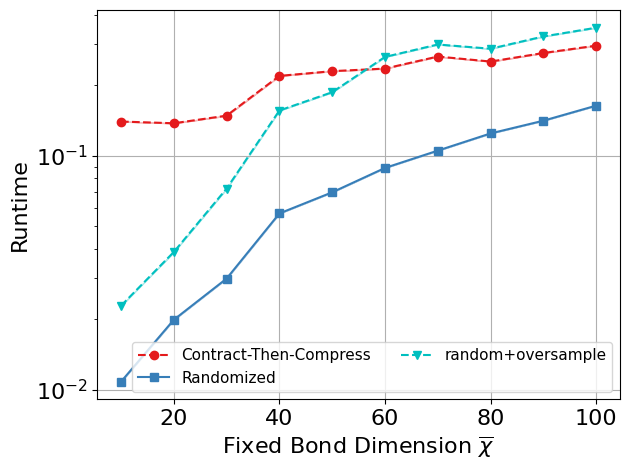

<Figure size 3200x2400 with 0 Axes>

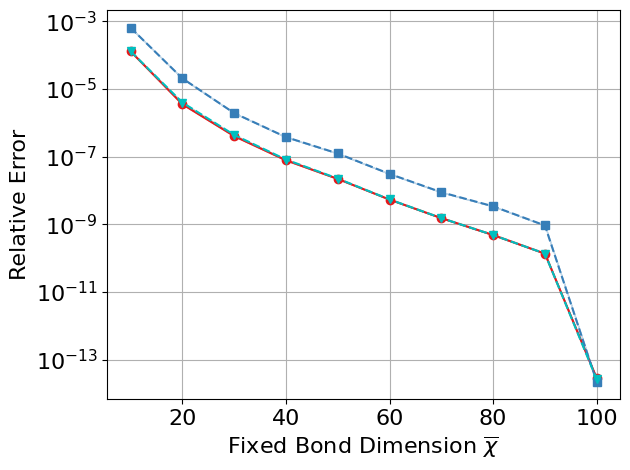

In [12]:
    # High resolution separate plots
plt.figure(dpi=500)
plot_times(names, bond_dims, times, std_times)
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(dpi=500)
plot_accuracy(names, bond_dims, accs, std_accs)
plt.tight_layout()
plt.grid(True)

plt.show()

,Bond Dimension,naive Mean Time,naive Time Std,naive Mean Accuracy,naive Accuracy Std,random Mean Time,random Time Std,random Mean Accuracy,random Accuracy Std,zipup Mean Time,...,fit Mean Accuracy,fit Accuracy Std,density Mean Time,density Time Std,density Mean Accuracy,density Accuracy Std,rand_then_orth Mean Time,rand_then_orth Time Std,rand_then_orth Mean Accuracy,rand_then_orth Accuracy Std
0,5,6.94e+02,5.20e+00,1.89e-05,4.12e-19,1.74e-01,2.35e-03,1.79e-04,1.55e-05,1.66e-01,...,1.88e-05,1.96e-11,1.22e+02,3.25e-01,1.89e-05,0.00e+00,3.21e+01,1.28e+00,9.03e-05,8.66e-06
1,10,6.91e+02,1.11e+00,4.78e-07,0.00e+00,2.91e-01,8.01e-03,3.86e-06,5.72e-07,3.18e-01,...,4.78e-07,2.48e-12,1.22e+02,3.74e-01,4.78e-07,0.00e+00,3.37e+01,2.48e+00,2.24e-06,2.35e-07
2,15,6.90e+02,9.42e-01,5.32e-08,6.62e-24,3.97e-01,1.85e-02,4.19e-07,2.11e-08,5.62e-01,...,5.32e-08,3.75e-13,1.22e+02,2.88e-01,7.04e-08,0.00e+00,3.13e+01,7.43e-01,2.29e-07,1.67e-08
3,20,6.90e+02,8.36e-01,9.49e-09,0.00e+00,5.22e-01,1.38e-02,6.91e-08,5.14e-09,7.85e-01,...,9.49e-09,4.90e-13,1.21e+02,1.43e-01,1.06e-08,0.00e+00,3.20e+01,5.48e-01,3.59e-08,1.55e-09
4,25,6.91e+02,7.30e-01,3.03e-09,4.14e-25,6.36e-01,6.10e-03,1.95e-08,8.90e-10,1.08e+00,...,3.03e-09,5.96e-14,1.22e+02,3.81e-01,3.53e-09,0.00e+00,3.23e+01,6.02e-01,1.17e-08,7.42e-10
5,30,6.93e+02,1.20e+00,7.65e-10,0.00e+00,7.55e-01,3.27e-02,6.04e-09,2.29e-10,1.37e+00,...,7.65e-10,1.07e-14,1.23e+02,4.14e-01,1.42e-09,0.00e+00,3.55e+01,3.84e+00,3.46e-09,1.10e-10
6,35,6.99e+02,6.01e+00,2.18e-10,2.58e-26,9.17e-01,1.12e-02,1.91e-09,4.68e-11,1.71e+00,...,2.18e-10,1.55e-16,1.23e+02,3.40e-01,2.95e-10,0.00e+00,3.76e+01,1.63e+00,9.95e-10,4.03e-11
7,40,6.97e+02,5.02e+00,8.66e-11,0.00e+00,1.07e+00,4.11e-02,6.76e-10,3.19e-11,2.06e+00,...,8.66e-11,6.26e-16,1.23e+02,4.08e-01,1.41e-10,0.00e+00,3.41e+01,9.93e-01,3.69e-10,9.19e-12
8,45,6.99e+02,6.33e+00,3.06e-11,0.00e+00,1.18e+00,8.08e-03,2.56e-10,1.73e-11,2.51e+00,...,3.06e-11,1.71e-16,1.24e+02,3.23e-01,4.44e-11,0.00e+00,3.44e+01,1.45e+00,1.38e-10,8.36e-12
9,50,7.02e+02,7.54e+00,2.49e-12,0.00e+00,1.42e+00,1.47e-02,4.38e-11,4.61e-12,2.95e+00,...,2.50e-12,2.26e-16,1.24e+02,1.70e-01,1.43e-11,0.00e+00,3.72e+01,1.47e+00,2.43e-11,2.58e-12


Data saved to Figure2_data/figure2_data_100_50_20240904_184058.csv


<Figure size 3200x2400 with 0 Axes>

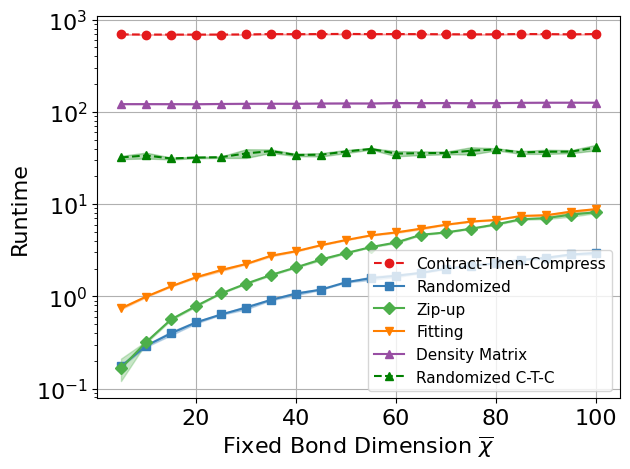

<Figure size 3200x2400 with 0 Axes>

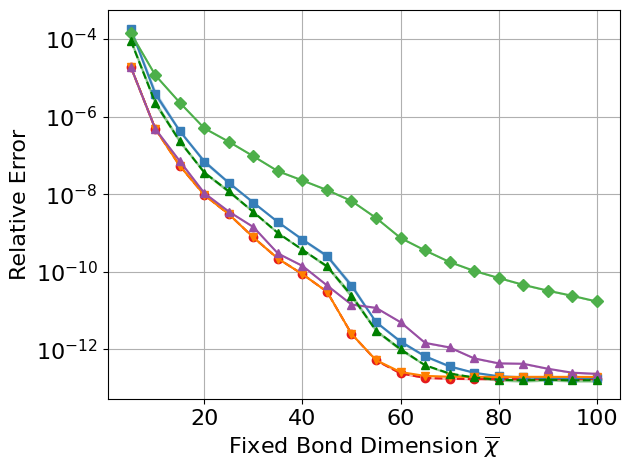

In [41]:
bond_dims = range(5, 105, 5) #Range 5-50
names = ['naive','random','zipup','fit','density','rand_then_orth']
times, std_times, accs, std_accs = fixed_synth_tensor_experiment(
    mpo=mpo,
    mps=mps,
    baseline=baseline,
    bond_dims=bond_dims,
    names=names,
    num_runs=5,
    highres=True,
    return_data=True
)

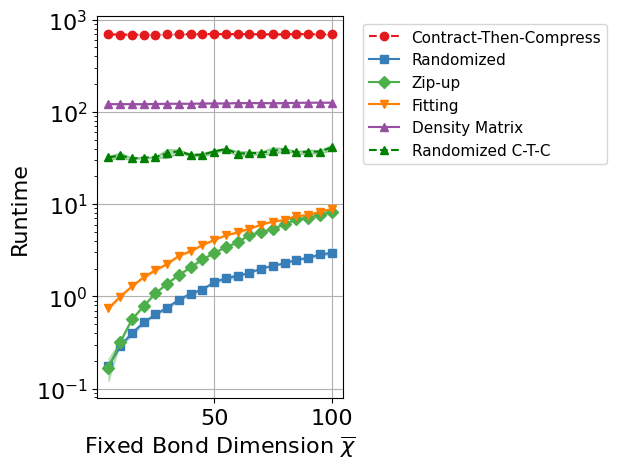

<Figure size 3200x2400 with 0 Axes>

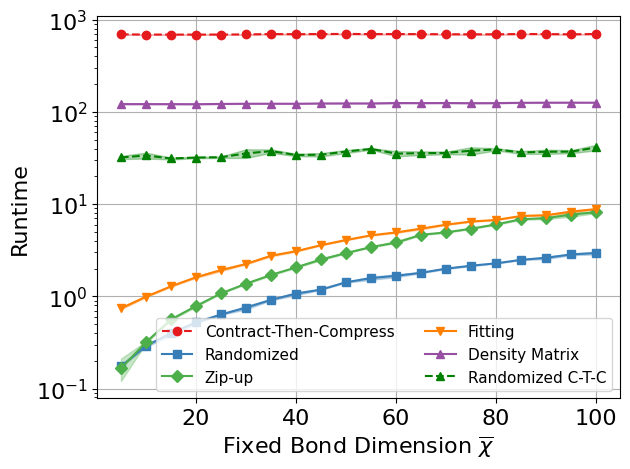

In [62]:
plt.figure(dpi=500)
plot_times(names, bond_dims, times, std_times)
plt.tight_layout()
plt.grid(True)
plt.show()

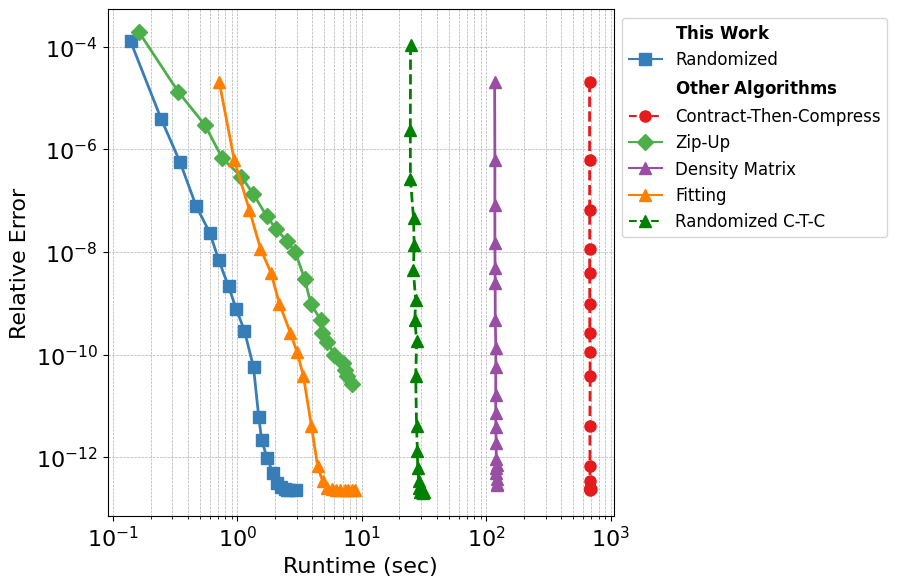

In [5]:

from matplotlib.lines import Line2D

def plot_runtime_vs_accuracy(test_names, times_data, std_times_data, accuracy_data, std_acc_data):
    fig, ax = plt.subplots(figsize=(11, 10))  # Increase figure size for a larger plot
    
    palette = sns.color_palette("Set1", 6)
    plot_styles = {
        'naive': (palette[0], 'o', 'Contract-Then-Compress', '--'),   # First color, circle marker, dashed line
        'random': (palette[1], 's', 'Randomized', '-'),  # Second color, square marker, solid line
        'zipup': (palette[2], 'D', 'Zip-up', '-'),       # Third color, diamond marker, solid line
        'density': (palette[3], '^', 'Density Matrix', '-'), # Fourth color, triangle up marker, solid line
        'fit': (palette[4], '^', 'Fitting', '-'),        # Fifth color, triangle down marker, solid line
        'rand_then_orth': ('g', '^', 'Randomized C-T-C', '--'),      
        'nyst': ('b', 'v', 'Nystrom ', '--'),
       # 'random+oversample': ('c', 'v', 'Rand+Oversample', '--'),      

    }

    handles = []
    labels = []

    for name in test_names:
        if name in plot_styles and name in times_data and name in accuracy_data:
            color, marker, label, linestyle = plot_styles[name]
            times = np.array(times_data[name])
            std_times = np.array(std_times_data[name])
            accuracy = np.array(accuracy_data[name])
            std_acc = np.array(std_acc_data[name])
            
            # Plot the line
            line, = ax.plot(times, accuracy, color=color, marker=marker, label=label,
                            markersize=8, linewidth=2, linestyle=linestyle)
            
            # Add shaded regions for std deviation
            #ax.fill_betweenx(accuracy, times - std_times, times + std_times, color=color, alpha=0.2)
            #ax.fill_between(times, accuracy - std_acc, accuracy + std_acc, color=color, alpha=0.2)

            handles.append(line)
            labels.append(label)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, which='both', ls='--', lw=0.5)
    ax.set_xlabel('Runtime (sec)', fontsize=16)
    ax.set_ylabel('Relative Error', fontsize=16)
    
    # Increase the font size of axis tick marks
    ax.tick_params(axis='both', which='major', labelsize=16)

    # Calculate the data ranges
    x_range = np.log10(ax.get_xlim()[1]) - np.log10(ax.get_xlim()[0])
    y_range = np.log10(ax.get_ylim()[1]) - np.log10(ax.get_ylim()[0])
    
    # Set the aspect ratio so that the physical lengths of the x and y axes are equal
    ax.set_aspect(x_range / y_range)

    legend_elements = [
        Line2D([0], [0], color='black', lw=0, label=r'$\bf{This\ Work}$'),  # Bold "This Work"
        Line2D([0], [0], color=palette[1], marker='s', linestyle='-', label='Randomized', markersize=8),
        #Line2D([0], [0], color='c', marker='v', linestyle='-', label='Randomized+Oversample', markersize=8),
        Line2D([0], [0], color='black', lw=0, label=r'$\bf{Other\ Algorithms}$'),  # Bold "Other Algorithms"
        Line2D([0], [0], color=palette[0], marker='o', linestyle='--', label='Contract-Then-Compress', markersize=8),
        Line2D([0], [0], color=palette[2], marker='D', linestyle='-', label='Zip-Up', markersize=8),
        Line2D([0], [0], color=palette[3], marker='^', linestyle='-', label='Density Matrix', markersize=8),
        Line2D([0], [0], color=palette[4], marker='^', linestyle='-', label='Fitting', markersize=8),
        Line2D([0], [0], color='g', marker='^', linestyle='--', label='Randomized C-T-C', markersize=8),
        # Line2D([0], [0], color='b', marker='v', linestyle='--', label='Nystrom Contraction', markersize=8),
    ]
    
    ax.legend(handles=legend_elements, fontsize=12, loc='upper left', bbox_to_anchor=(1, 1), frameon=True)

    # Adjust layout to prevent clipping
    plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust rect to leave more space for the legend on the right

    plt.show()

# Example usage:
plot_runtime_vs_accuracy(names, times, std_times, accs, std_accs)

Add left plot of fig 3 in there 

In [37]:
a = -.5
chi = 50
n = 100
mpo,mps,baseline = generate_baseline(n,chi,a,dtype=np.complex128)

Generating baseline contraction...


A

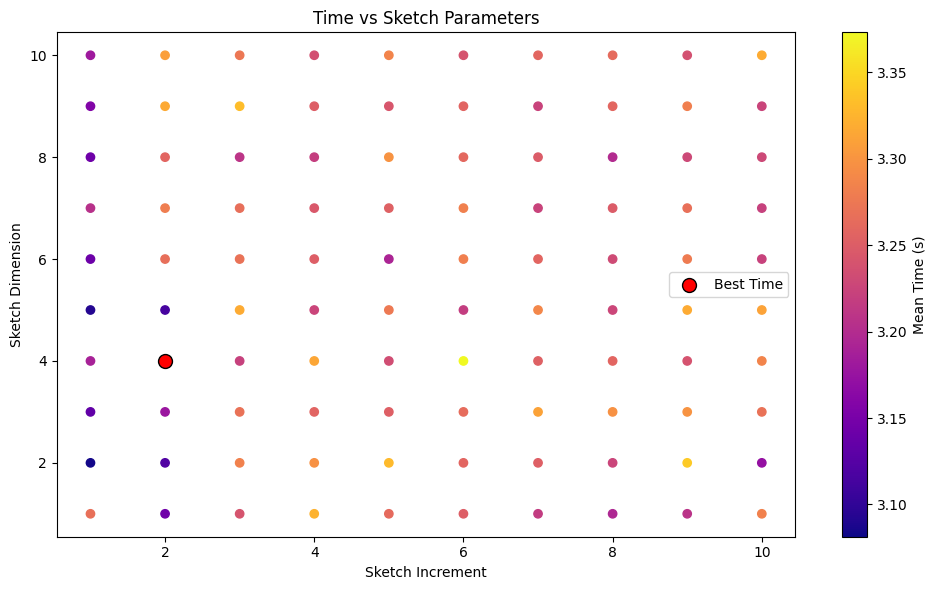

In [38]:
def grid_search_random_contraction(mpo, mps, bond_dims, N=1):
    sketch_range = range(1, 11)
    results = []

    for sketch_increment in sketch_range:
        for sketch_dim in sketch_range:
            print(f"Testing sketch_increment={sketch_increment}, sketch_dim={sketch_dim}")
            times = []

            for i in range(N):
                start = time.time()
                result = random_contraction_inc(
                    mpo, mps, stop=FixedDimension(bond_dims[-1]), accuracychecks=False, 
                    finalround=None, sketchincrement=sketch_increment, sketchdim=sketch_dim
                )
                times.append(time.time() - start)

            mean_time = np.mean(times)
            results.append((sketch_increment, sketch_dim, mean_time))
            clear_output(wait=True)

    # Find the best (minimum) runtime
    best_result = min(results, key=lambda x: x[2])
    best_sketch_increment, best_sketch_dim, best_time = best_result
    
    # Plot results
    plt.figure(figsize=(10, 6))
    sketch_increments = []
    sketch_dims = []
    time_vals = []

    for sketch_increment, sketch_dim, mean_time in results:
        sketch_increments.append(sketch_increment)
        sketch_dims.append(sketch_dim)
        time_vals.append(mean_time)

    plt.scatter(sketch_increments, sketch_dims, c=time_vals, cmap='plasma')
    plt.colorbar(label='Mean Time (s)')
    plt.xlabel('Sketch Increment')
    plt.ylabel('Sketch Dimension')
    plt.title('Time vs Sketch Parameters')

    # Highlight the best runtime with a red circle
    plt.scatter([best_sketch_increment], [best_sketch_dim], c='red', edgecolor='black', s=100, label='Best Time')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
bond_dims = range(5, 105, 5) #Range 5-50
grid_search_random_contraction(mpo, mps, bond_dims,1)

/var/folders/6k/g8w9pg6j4b3b_76hhg422g440000gn/T/ipykernel_6738/2520668578.py:5: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.4)  # Increase the width space between the subplots


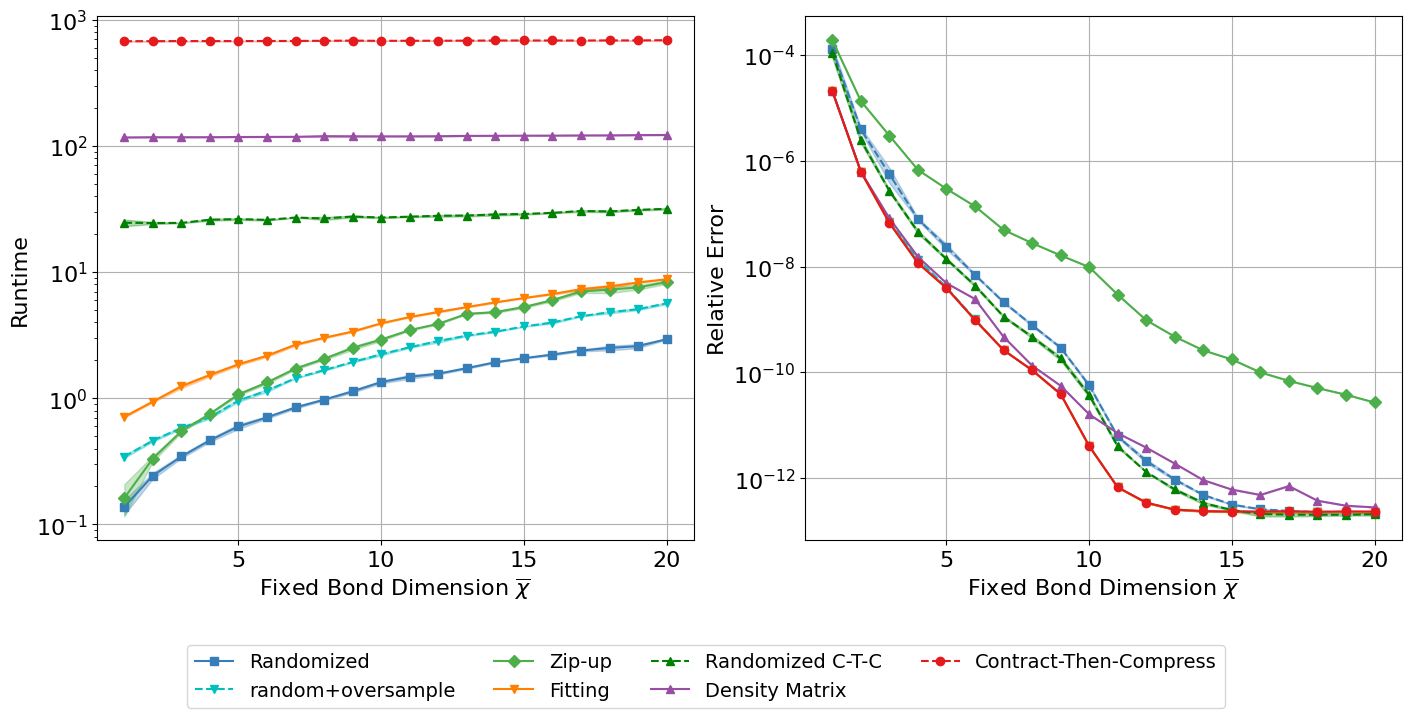

In [34]:
def plot_combined(test_names, var, mean_times_data, std_times_data, mean_acc_data, std_acc_data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

    # Increase spacing between the plots
    plt.subplots_adjust(wspace=0.4)  # Increase the width space between the subplots

    # Plot the times on the left and accuracy on the right
    plot_times(test_names, var, mean_times_data, std_times_data, ax=ax1)
    plot_accuracy(test_names, var, mean_acc_data, std_acc_data, ax=ax2)

    # Create a shared legend below the plots, placed under the x-axis titles
    handles, labels = ax1.get_legend_handles_labels()  # Assuming both plots have the same labels
    fig.legend(handles, labels, loc='upper center', fontsize=14, ncol=4, bbox_to_anchor=(0.5, -0.05))

    return fig
var = np.arange(1, 21)

times, std_times, accs, std_accs
fig = plot_combined(names, var, times, std_times, accs, std_accs)
plt.show()


TypeError: plot_combined.<locals>.plot_runtime_vs_accuracy() got an unexpected keyword argument 'ax'

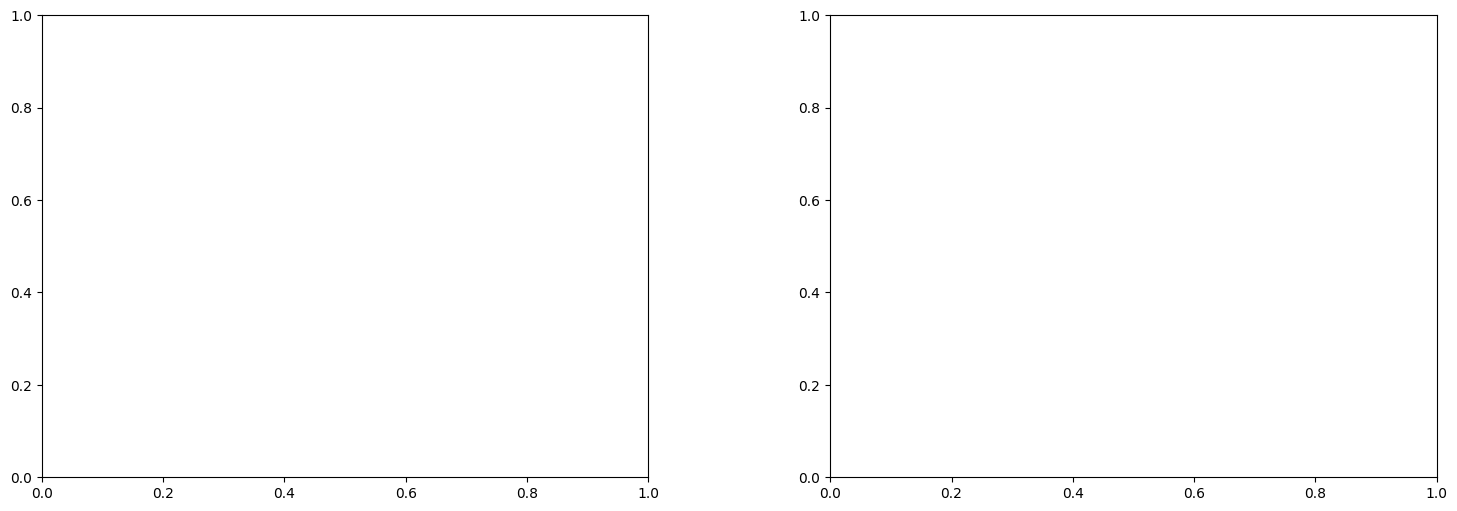

In [75]:
def plot_combined(test_names, var, mean_times_data, std_times_data, mean_acc_data, std_acc_data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=False)

    # Increase spacing between the plots
    plt.subplots_adjust(wspace=.3)  # Increase the width space between the subplots even more

    # Update plot styles within the plot_times function
    def plot_runtime_vs_accuracy(test_names, times_data, std_times_data, accuracy_data, std_acc_data):
        fig, ax = plt.subplots(figsize=(10, 9))  # Increase figure size for a larger plot
        
        palette = sns.color_palette("Set1", 6)
        plot_styles = {
            'naive': (palette[0], 'o', 'Contract-Then-Compress', '--'),   # First color, circle marker, dashed line
            'random': (palette[1], 's', 'Randomized', '-'),  # Second color, square marker, solid line
            'zipup': (palette[2], 'D', 'Zip-up', '-'),       # Third color, diamond marker, solid line
            'density': (palette[3], '^', 'Density Matrix', '-'), # Fourth color, triangle up marker, solid line
            'fit': (palette[4], 'v', 'Fitting', '-'),        # Fifth color, triangle down marker, solid line
            'rand_then_orth': ('g', '^', 'Randomized C-T-C', '--'),      
            'nyst': ('b', 'v', 'Nystrom ', '--'),
            'random+oversample': ('c', '^', 'Rand+oversample', '--'),      

        }

        handles = []
        labels = []

        for name in test_names:
            if name in plot_styles and name in times_data and name in accuracy_data:
                color, marker, label, linestyle = plot_styles[name]
                times = np.array(times_data[name])
                std_times = np.array(std_times_data[name])
                accuracy = np.array(accuracy_data[name])
                std_acc = np.array(std_acc_data[name])
                
                # Plot the line
                line, = ax.plot(times, accuracy, color=color, marker=marker, label=label,
                                markersize=8, linewidth=2, linestyle=linestyle)
                
                # Add shaded regions for std deviation
                #ax.fill_betweenx(accuracy, times - std_times, times + std_times, color=color, alpha=0.2)
                #ax.fill_between(times, accuracy - std_acc, accuracy + std_acc, color=color, alpha=0.2)

                handles.append(line)
                labels.append(label)

        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.grid(True, which='both', ls='--', lw=0.5)
        ax.set_xlabel('Runtime', fontsize=16)
        ax.set_ylabel('Relative Error', fontsize=16)
        
        # Increase the font size of axis tick marks
        ax.tick_params(axis='both', which='major', labelsize=16)

        # Calculate the data ranges
        #$x_range = np.log10(ax.get_xlim()[1]) - np.log10(ax.get_xlim()[0])
        #y_range = np.log10(ax.get_ylim()[1]) - np.log10(ax.get_ylim()[0])
        
        # # Set the aspect ratio so that the physical lengths of the x and y axes are equal
        # ax.set_aspect(x_range / y_range)

        # legend_elements = [
        #     Line2D([0], [0], color='black', lw=0, label=r'$\bf{This\ Work}$'),  # Bold "This Work"
        #     Line2D([0], [0], color=palette[1], marker='s', linestyle='-', label='Randomized', markersize=8),
        #     Line2D([0], [0], color='black', lw=0, label=r'$\bf{Other\ Algorithms}$'),  # Bold "Other Algorithms"
        #     Line2D([0], [0], color=palette[0], marker='o', linestyle='--', label='Contract-Then-Compress', markersize=8),
        #     Line2D([0], [0], color=palette[2], marker='D', linestyle='-', label='Zip-up', markersize=8),
        #     Line2D([0], [0], color=palette[3], marker='^', linestyle='-', label='Density Matrix', markersize=8),
        #     Line2D([0], [0], color=palette[4], marker='v', linestyle='-', label='Fitting', markersize=8),
        #     Line2D([0], [0], color='g', marker='^', linestyle='--', label='Randomized C-T-C', markersize=8),
        #     # Line2D([0], [0], color='b', marker='v', linestyle='--', label='Nystrom Contraction', markersize=8),
        # ]
        
        #ax.legend(handles=legend_elements, fontsize=12, loc='upper left', bbox_to_anchor=(1, 1), frameon=True)

        # Adjust layout to prevent clipping
        plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust rect to leave more space for the legend on the right

        plt.show()
        return ax

    # Update plot styles within the plot_accuracy function
    def plot_accuracy(test_names, var, mean_acc_data, std_acc_data, ax=None):
        palette = sns.color_palette("Set1", 6)
        plot_styles = {
            'naive': (palette[0], 'o', 'Contract-Then-Compress', '-'),
            'random': (palette[1], 's', 'Randomized', '-'),
            'zipup': (palette[2], 'D', 'Zip-Up', '-'),
            'density': (palette[3], '^', 'Density Matrix', '-'),
            'fit': (palette[4], '^', 'Fitting', '-'),
            'rand_then_orth': ('g', '^', 'Randomized C-T-C', '--'),
            'nyst': ('b', 'v', 'Nystrom Contraction', '--'),
            'random+oversample': ('c', 'v', 'Randomized+Oversample', '--'),
        }

        for name in test_names:
            if name in plot_styles and name in mean_acc_data:
                color, marker, label, linestyle = plot_styles[name]
                mean_acc = np.array(mean_acc_data[name])
                std_acc = np.array(std_acc_data[name])
                # If it's Contract-Then-Compress, we use an open circle with fillstyle='none'
                if name == 'naive':
                    ax.plot(var, mean_acc, color=color, marker=marker, label=label, markersize=8, 
                            linewidth=1, linestyle=linestyle, markerfacecolor='none', markeredgewidth=1, alpha=.8)
                elif name == 'random+oversample':
                    ax.plot(var, mean_acc, color=color, marker=marker, label=label, markersize=10, 
                            linewidth=1.5, linestyle=linestyle, markeredgewidth=1)
                elif name == 'fit':
                    ax.plot(var, mean_acc, color=color, marker=marker, label=label, markersize=10, 
                            linewidth=1.5, linestyle=linestyle, markeredgewidth=1)
                else:
                    ax.plot(var, mean_acc, color=color, marker=marker, label=label, markersize=6, 
                            linewidth=1.5, linestyle=linestyle)
                
                ax.fill_between(var, mean_acc - std_acc, mean_acc + std_acc, color=color, alpha=0.3)

        ax.set_yscale('log')
        ax.grid()
        ax.set_xlabel(r'Fixed Bond Dimension $\overline{\chi}$', fontsize=16)
        ax.set_ylabel('Relative Error', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=16)
        return ax

    # Plot the times on the left and accuracy on the right
    plot_runtime_vs_accuracy(test_names, var, mean_times_data, std_times_data, ax=ax1)
    plot_accuracy(test_names, var, mean_acc_data, std_acc_data, ax=ax2)

    # Create a shared legend below the plots, placed under the x-axis titles
    handles, labels = ax1.get_legend_handles_labels()  # Assuming both plots have the same labels
    fig.legend(handles, labels, loc='lower center', fontsize=14, ncol=4, bbox_to_anchor=(0.5, .9))

    return fig

# Example usage
var = np.arange(1, 21)
times, std_times, accs, std_accs
fig = plot_combined(names, var, times, std_times, accs, std_accs)
plt.show()

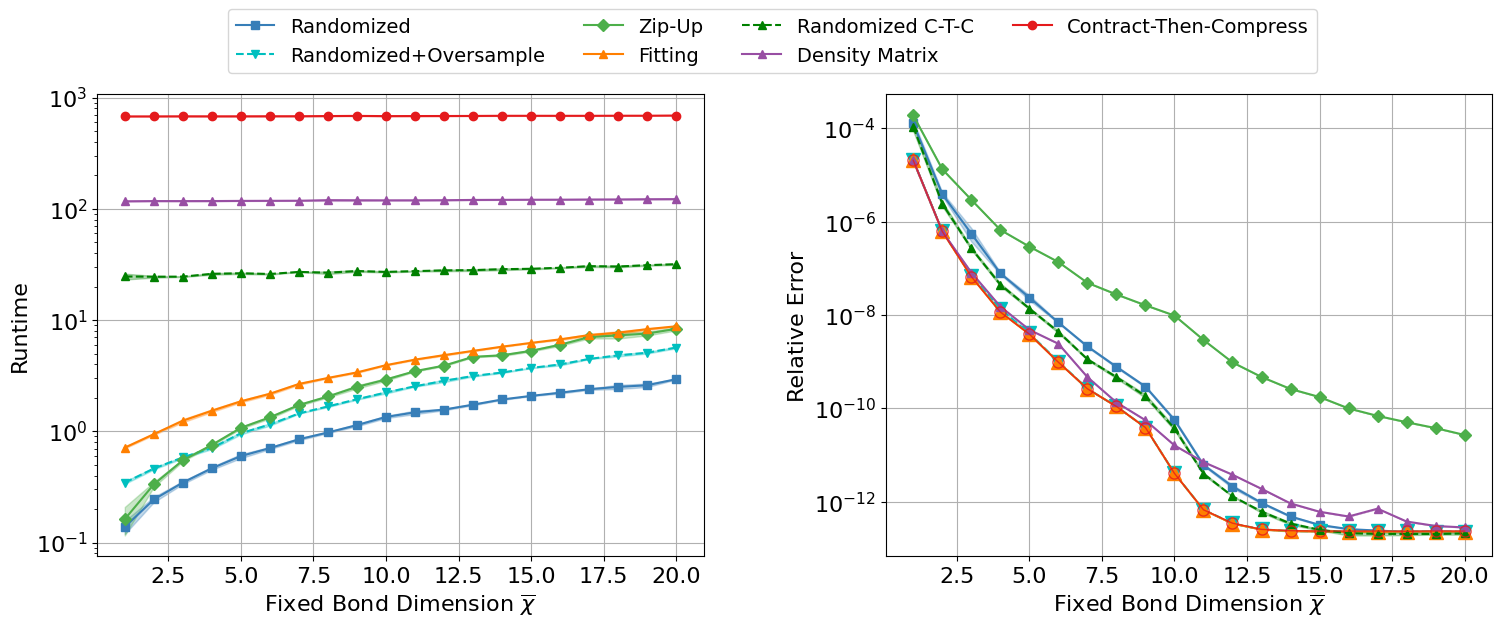

In [76]:
def plot_combined(test_names, var, mean_times_data, std_times_data, mean_acc_data, std_acc_data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=False)

    # Increase spacing between the plots
    plt.subplots_adjust(wspace=.3)  # Increase the width space between the subplots even more

    # Update plot styles within the plot_times function
    def plot_times(test_names, var, mean_times_data, std_times_data, ax=None):
        palette = sns.color_palette("Set1", 6)
        plot_styles = {
            'naive': (palette[0], 'o', 'Contract-Then-Compress', '-'),
            'random': (palette[1], 's', 'Randomized', '-'),
            'zipup': (palette[2], 'D', 'Zip-Up', '-'),
            'density': (palette[3], '^', 'Density Matrix', '-'),
            'fit': (palette[4], '^', 'Fitting', '-'),
            'rand_then_orth': ('g', '^', 'Randomized C-T-C', '--'),
            'nyst': ('b', 'v', 'Nystrom Contraction', '--'),
            'random+oversample': ('c', 'v', 'Randomized+Oversample', '--'),
        }

        for name in test_names:
            if name in plot_styles and name in mean_times_data:
                color, marker, label, linestyle = plot_styles[name]
                mean_times = np.array(mean_times_data[name])
                std_times = np.array(std_times_data[name])
                ax.plot(var, mean_times, color=color, marker=marker, label=label, markersize=6, linewidth=1.5, linestyle=linestyle)
                ax.fill_between(var, mean_times - std_times, mean_times + std_times, color=color, alpha=0.3)

        ax.set_yscale('log')
        ax.grid()
        ax.set_xlabel(r'Fixed Bond Dimension $\overline{\chi}$', fontsize=16)
        ax.set_ylabel('Runtime', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=16)
        return ax

    # Update plot styles within the plot_accuracy function
    def plot_accuracy(test_names, var, mean_acc_data, std_acc_data, ax=None):
        palette = sns.color_palette("Set1", 6)
        plot_styles = {
            'naive': (palette[0], 'o', 'Contract-Then-Compress', '-'),
            'random': (palette[1], 's', 'Randomized', '-'),
            'zipup': (palette[2], 'D', 'Zip-Up', '-'),
            'density': (palette[3], '^', 'Density Matrix', '-'),
            'fit': (palette[4], '^', 'Fitting', '-'),
            'rand_then_orth': ('g', '^', 'Randomized C-T-C', '--'),
            'nyst': ('b', 'v', 'Nystrom Contraction', '--'),
            'random+oversample': ('c', 'v', 'Randomized+Oversample', '--'),
        }

        for name in test_names:
            if name in plot_styles and name in mean_acc_data:
                color, marker, label, linestyle = plot_styles[name]
                mean_acc = np.array(mean_acc_data[name])
                std_acc = np.array(std_acc_data[name])
                # If it's Contract-Then-Compress, we use an open circle with fillstyle='none'
                if name == 'naive':
                    ax.plot(var, mean_acc, color=color, marker=marker, label=label, markersize=8, 
                            linewidth=1, linestyle=linestyle, markerfacecolor='none', markeredgewidth=1, alpha=.8)
                elif name == 'random+oversample':
                    ax.plot(var, mean_acc, color=color, marker=marker, label=label, markersize=10, 
                            linewidth=1.5, linestyle=linestyle, markeredgewidth=1)
                elif name == 'fit':
                    ax.plot(var, mean_acc, color=color, marker=marker, label=label, markersize=10, 
                            linewidth=1.5, linestyle=linestyle, markeredgewidth=1)
                else:
                    ax.plot(var, mean_acc, color=color, marker=marker, label=label, markersize=6, 
                            linewidth=1.5, linestyle=linestyle)
                
                ax.fill_between(var, mean_acc - std_acc, mean_acc + std_acc, color=color, alpha=0.3)

        ax.set_yscale('log')
        ax.grid()
        ax.set_xlabel(r'Fixed Bond Dimension $\overline{\chi}$', fontsize=16)
        ax.set_ylabel('Relative Error', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=16)
        return ax

    # Plot the times on the left and accuracy on the right
    plot_times(test_names, var, mean_times_data, std_times_data, ax=ax1)
    plot_accuracy(test_names, var, mean_acc_data, std_acc_data, ax=ax2)

    # Create a shared legend below the plots, placed under the x-axis titles
    handles, labels = ax1.get_legend_handles_labels()  # Assuming both plots have the same labels
    fig.legend(handles, labels, loc='lower center', fontsize=14, ncol=4, bbox_to_anchor=(0.5, .9))

    return fig

# Example usage
var = np.arange(1, 21)
times, std_times, accs, std_accs
fig = plot_combined(names, var, times, std_times, accs, std_accs)
plt.show()

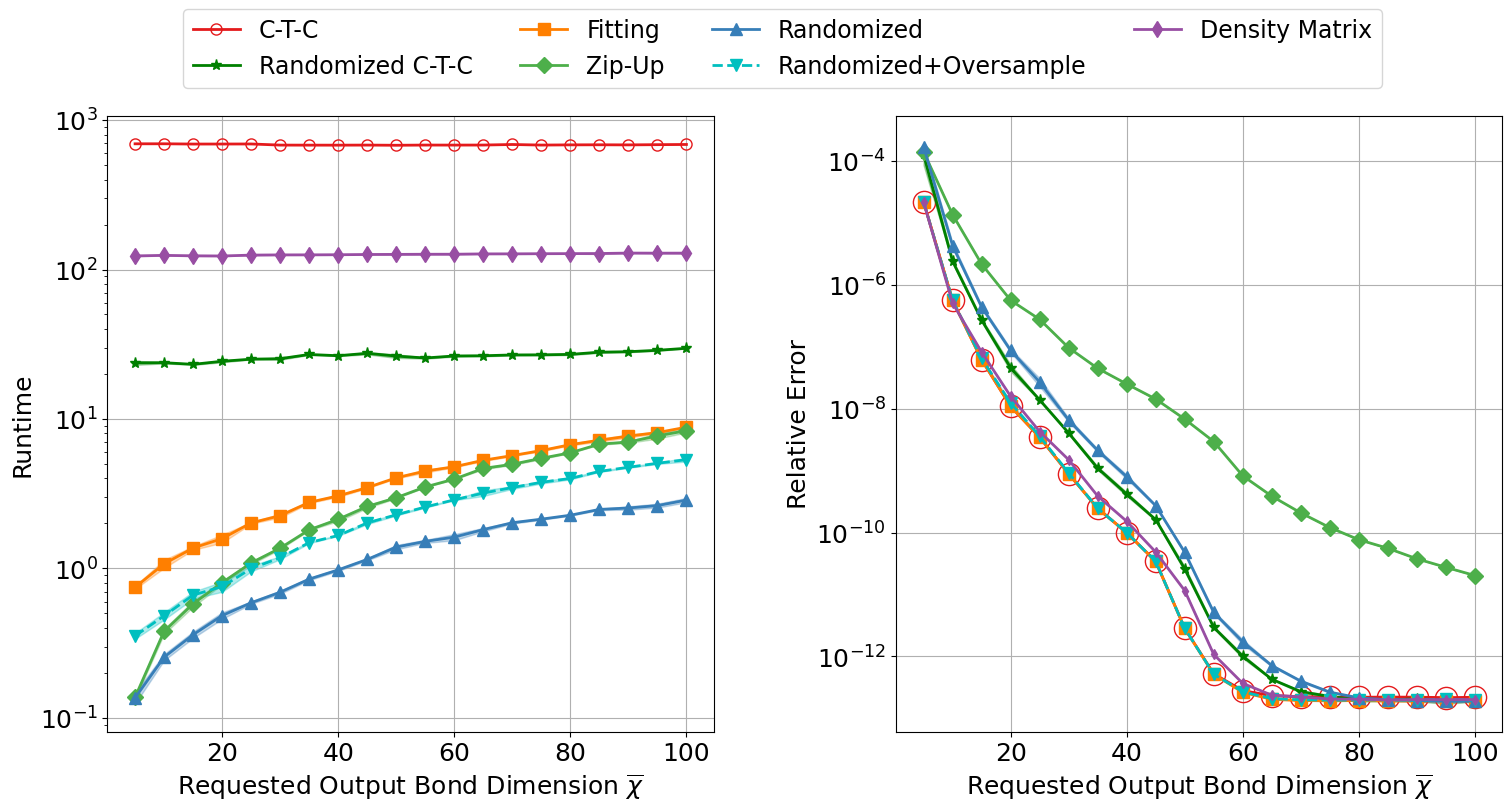

In [4]:
def plot_combined(test_names, var, mean_times_data, std_times_data, mean_acc_data, std_acc_data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=False) #18,6
    global_font_size = 18
    global_marker_size = 8
    global_line_width =2 
    # Increase spacing between the plots
    plt.subplots_adjust(wspace=.3)  # Increase the width space between the subplots even more

    # Update plot styles within the plot_times function
    def plot_times(test_names, var, mean_times_data, std_times_data, ax=None):
        palette = sns.color_palette("Set1", 6)
        plot_styles = {
            'naive': (palette[0], 'o', 'C-T-C', '-'),
            'random': (palette[1], '^', 'Randomized', '-'),
            'zipup': (palette[2], 'D', 'Zip-Up', '-'),
            'density': (palette[3], 'd', 'Density Matrix', '-'),
            'fit': (palette[4], 's', 'Fitting', '-'),
            'rand_then_orth': ('g', '*', 'Randomized C-T-C', '-'),
            #'nyst': ('b', 'v', 'Nystrom Contraction', '--'),
            'random+oversample': ('c', 'v', 'Randomized+Oversample', '--'),
        }

        for name in test_names:
            if name in plot_styles and name in mean_times_data:
                color, marker, label, linestyle = plot_styles[name]
                mean_times = np.array(mean_times_data[name])
                std_times = np.array(std_times_data[name])
                if name == 'naive':
                    ax.plot(var, mean_times, color=color, marker=marker, label=label, markersize=8, 
                            linewidth=global_line_width, linestyle=linestyle, markerfacecolor='none', markeredgewidth=1, alpha=1)
                else:
                    ax.plot(var, mean_times, color=color, marker=marker, label=label, markersize=global_marker_size, linewidth=global_line_width, linestyle=linestyle)
                    ax.fill_between(var, mean_times - std_times, mean_times + std_times, color=color, alpha=0.3)

        ax.set_yscale('log')
        ax.grid()
        ax.set_xlabel(r'Requested Output Bond Dimension $\overline{\chi}$', fontsize=global_font_size)
        ax.set_ylabel('Runtime', fontsize=global_font_size)
        ax.tick_params(axis='both', which='major', labelsize=global_font_size)
        return ax

    # Update plot styles within the plot_accuracy function
    def plot_accuracy(test_names, var, mean_acc_data, std_acc_data, ax=None):
        palette = sns.color_palette("Set1", 6)
        plot_styles = {
            'naive': (palette[0], 'o', 'C-T-C', '-'),
            'random': (palette[1], '^', 'Randomized', '-'),
            'zipup': (palette[2], 'D', 'Zip-Up', '-'),
            'density': (palette[3], 'd', 'Density Matrix', '-'),
            'fit': (palette[4], 's', 'Fitting', '-'),
            'rand_then_orth': ('g', '*', 'Randomized C-T-C', '-'),
            #nyst': ('b', 'v', 'Nystrom Contraction', '--'),
            'random+oversample': ('c', 'v', 'Randomized+Oversample', '--'),
        }

        for name in test_names:
            if name in plot_styles and name in mean_acc_data:
                color, marker, label, linestyle = plot_styles[name]
                mean_acc = np.array(mean_acc_data[name])
                std_acc = np.array(std_acc_data[name])
                # If it's Contract-Then-Compress, we use an open circle with fillstyle='none'
                if name == 'naive':
                    ax.plot(var, mean_acc, color=color, marker=marker, label=label, markersize=16, 
                            linewidth=global_line_width, linestyle=linestyle, markerfacecolor='none', markeredgewidth=1, alpha=1)
                elif name == 'random+oversample':
                    ax.plot(var, mean_acc, color=color, marker=marker, label=label, markersize=global_marker_size, 
                            linewidth=global_line_width, linestyle=linestyle, markeredgewidth=1)
                elif name == 'density':
                    ax.plot(var, mean_acc, color=color, marker=marker, label=label, markersize=5, 
                            linewidth=global_line_width, linestyle=linestyle, markeredgewidth=1)
                elif name == 'fit':
                    ax.plot(var, mean_acc, color=color, marker=marker, label=label, markersize=global_marker_size, 
                            linewidth=global_line_width, linestyle=linestyle, markeredgewidth=1)
                else:
                    ax.plot(var, mean_acc, color=color, marker=marker, label=label, markersize=global_marker_size, 
                            linewidth=global_line_width, linestyle=linestyle)
                
                ax.fill_between(var, mean_acc - std_acc, mean_acc + std_acc, color=color, alpha=0.3)

        ax.set_yscale('log')
        ax.grid()
        #ax.set_xticks([0,5,10,15,20,25]) 

        ax.set_xlabel(r'Requested Output Bond Dimension $\overline{\chi}$', fontsize=global_font_size)
        ax.set_ylabel('Relative Error', fontsize=global_font_size)
        ax.tick_params(axis='both', which='major', labelsize=global_font_size)
        return ax

    # Plot the times on the left and accuracy on the right
    plot_times(test_names, var, mean_times_data, std_times_data, ax=ax1)
    plot_accuracy(test_names, var, mean_acc_data, std_acc_data, ax=ax2)

    # Create a shared legend below the plots, placed under the x-axis titles
    handles, labels = ax1.get_legend_handles_labels()  # Assuming both plots have the same labels
    fig.legend(handles, labels, loc='lower center', fontsize=17, ncol=4, bbox_to_anchor=(0.5, .9))

    return fig

# Example usage
var = range(5, 105, 5) #Range 5-50
names = ['naive','rand_then_orth','fit','zipup','random','random+oversample','density']#,'zipup','fit','density','rand_then_orth']

times, std_times, accs, std_accs
fig = plot_combined(names, var, times, std_times, accs, std_accs)
plt.show()

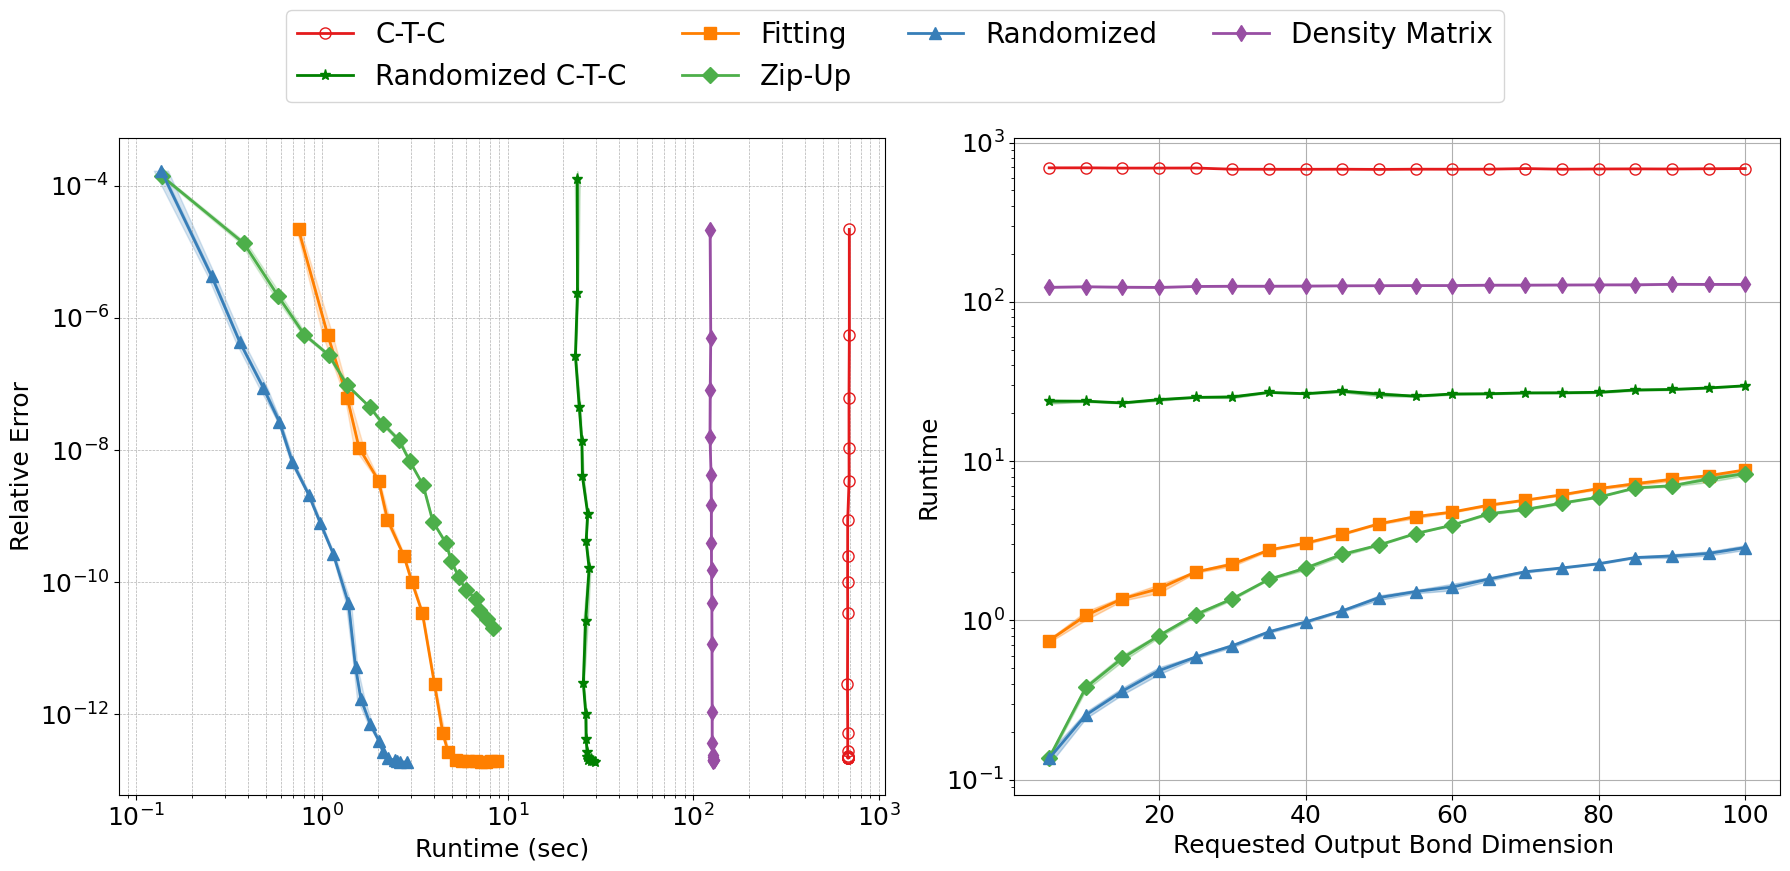

In [8]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_runtime_vs_accuracy(test_names, times_data, std_times_data, accuracy_data, std_acc_data, var, mean_times_data, std_times_data_var):
    # Create a figure with two horizontal subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=False)  # 18x8 figure
    global_font_size = 18
    global_marker_size = 8
    global_line_width = 2
    plt.subplots_adjust(wspace=0.3, top=0.85)  # Increase the width space between the subplots and space for legend

    # Plot runtime vs accuracy on the first subplot (ax1)
    palette = sns.color_palette("Set1", 6)
    plot_styles = {
        'naive': (palette[0], 'o', 'C-T-C', '-'),
        'random': (palette[1], '^', 'Randomized', '-'),
        'zipup': (palette[2], 'D', 'Zip-Up', '-'),
        'density': (palette[3], 'd', 'Density Matrix', '-'),
        'fit': (palette[4], 's', 'Fitting', '-'),
        'rand_then_orth': ('g', '*', 'Randomized C-T-C', '-'),
    }

    handles = []
    labels = []

    for name in test_names:
        if name in plot_styles and name in times_data and name in accuracy_data:
            color, marker, label, linestyle = plot_styles[name]
            times = np.array(times_data[name])
            std_times = np.array(std_times_data[name])
            accuracy = np.array(accuracy_data[name])
            std_acc = np.array(std_acc_data[name])
            if name == 'naive':
                line, = ax1.plot(times, accuracy, color=color, marker=marker, label=label, markersize=8, 
                            linewidth=global_line_width, linestyle=linestyle, markerfacecolor='none', markeredgewidth=1, alpha=1)
            # Plot the line
            else:
                line, = ax1.plot(times, accuracy, color=color, marker=marker, label=label,
                            markersize=global_marker_size, linewidth=global_line_width, linestyle=linestyle)

            # Add standard deviation for times and accuracy
            ax1.fill_between(times, accuracy - std_acc, accuracy + std_acc, color=color, alpha=0.2)
            ax1.fill_betweenx(accuracy, times - std_times, times + std_times, color=color, alpha=0.2)

            handles.append(line)
            labels.append(label)

    # Set log scales and labels
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.grid(True, which='both', ls='--', lw=0.5)
    ax1.set_xlabel('Runtime (sec)', fontsize=global_font_size)
    ax1.set_ylabel('Relative Error', fontsize=global_font_size)
    ax1.tick_params(axis='both', which='major', labelsize=global_font_size)

    # Remove manual aspect ratio setting for ax1
    # ax1.set_aspect(x_range / y_range)  # Removed

    # Legend for the first plot above the figure
    handles, labels = ax1.get_legend_handles_labels()  # Assuming both plots have the same labels
    fig.legend(handles, labels, loc='lower center', fontsize=20, ncol=4, bbox_to_anchor=(0.5, .95))

    # Now plot requested bond dimension vs runtime on the second subplot (ax2)
    def plot_times(test_names, var, mean_times_data, std_times_data, ax):
        plot_styles = {
            'naive': (palette[0], 'o', 'C-T-C', '-'),
            'random': (palette[1], '^', 'Randomized', '-'),
            'zipup': (palette[2], 'D', 'Zip-Up', '-'),
            'density': (palette[3], 'd', 'Density Matrix', '-'),
            'fit': (palette[4], 's', 'Fitting', '-'),
            'rand_then_orth': ('g', '*', 'Randomized C-T-C', '-'),
        }

        for name in test_names:
            if name in plot_styles and name in mean_times_data:
                color, marker, label, linestyle = plot_styles[name]
                mean_times = np.array(mean_times_data[name])
                std_times = np.array(std_times_data[name])

                if name == 'naive':
                    ax.plot(var, mean_times, color=color, marker=marker, label=label,
                            markersize=global_marker_size, linewidth=global_line_width,
                            linestyle=linestyle, markerfacecolor='none', markeredgewidth=1, alpha=1)
                else:
                    ax.plot(var, mean_times, color=color, marker=marker, label=label,
                            markersize=global_marker_size, linewidth=global_line_width, linestyle=linestyle)
                    ax.fill_between(var, mean_times - std_times, mean_times + std_times, color=color, alpha=0.3)

        ax.set_yscale('log')
        ax.grid()
        ax.set_xlabel(r'Requested Output Bond Dimension $\overline{\chi}$', fontsize=global_font_size)
        ax.set_ylabel('Runtime', fontsize=global_font_size)
        ax.tick_params(axis='both', which='major', labelsize=global_font_size)

    # Call plot_times for the second subplot (ax2)
    plot_times(test_names, var, mean_times_data, std_times_data_var, ax=ax2)

    # Adjust layout to prevent clipping
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to leave space for legend
    plt.show()

# Example usage:
names = ['naive','rand_then_orth','fit','zipup','random','density']#,'zipup','fit','density','rand_then_orth']

plot_runtime_vs_accuracy(names, times, std_times, accs, std_accs, var, times, std_times)